# Navigation


## Model Testing

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from random import randint
from agent import DQNAgent, DoubleDQNAgent
from collections import deque
import numpy as np
import torch
import matplotlib.pyplot as plt
from typing import List


def load_agent(agent: DQNAgent, file_name: str = "checkpoint.pth") -> int:
    """
    Load agent's Q-network weights and optionally episode number from a file.

    Args:
        agent (DQNAgent): The agent to which the Q-network weights should be loaded.
        file_name (str): The path to the file from which the data should be loaded.

    Returns:
        int or None: The episode number at which the model was saved or None if not saved.
    """
    checkpoint = torch.load(file_name)
    agent.q_network.load_state_dict(checkpoint["q_network_state_dict"])
    agent.q_network.eval()  # Set the network to evaluation mode
    return checkpoint.get("episode", None)


seed=32
worker_id=randint(0, 10000)
print('worker_id', worker_id)
env = UnityEnvironment(file_name="Banana.app", worker_id=worker_id, seed=seed)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# Create DQN agent
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])
agent = DoubleDQNAgent(state_size=state_size, action_size=action_size,fc1_dim=128, fc2_dim=64, seed=seed, dueling=True)

# load model to agent
load_agent(agent, './models/navigation_dqn_checkpoint_dueling_True_double_True.pth')

# put env on eval model
env_info = env.reset(train_mode=False)[brain_name]

# initialize state
state = env_info.vector_observations[0]

# initialize score
total_score = 0

while True:
    action = agent.act(state)                      # select action 
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    total_score += reward
    state = next_state
    if done:
        break

print("Score: {}".format(total_score))

env.close()

worker_id 1989
Mono path[0] = '/Users/Naoufal_1/Desktop/repos/navigation_project/p1_navigation/Banana.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/Naoufal_1/Desktop/repos/navigation_project/p1_navigation/Banana.app/Contents/MonoBleedingEdge/etc'


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Score: 18.0


worker_id 2035
Mono path[0] = '/Users/Naoufal_1/Desktop/repos/navigation_project/p1_navigation/Banana.app/Contents/Resources/Data/Managed'
Mono config path = '/Users/Naoufal_1/Desktop/repos/navigation_project/p1_navigation/Banana.app/Contents/MonoBleedingEdge/etc'


INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


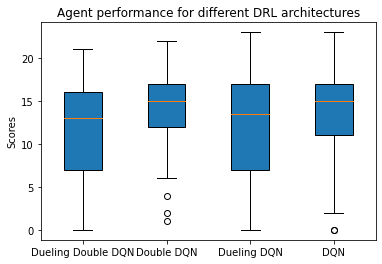

In [1]:
from collections import deque
from unityagents import UnityEnvironment
import numpy as np
from random import randint
from agent import DQNAgent, DoubleDQNAgent
from collections import deque
import numpy as np
import torch
import matplotlib.pyplot as plt
from typing import List


def load_agent(agent: DQNAgent, file_name: str = "checkpoint.pth") -> int:
    """
    Load agent's Q-network weights and optionally episode number from a file.

    Args:
        agent (DQNAgent): The agent to which the Q-network weights should be loaded.
        file_name (str): The path to the file from which the data should be loaded.

    Returns:
        int or None: The episode number at which the model was saved or None if not saved.
    """
    checkpoint = torch.load(file_name)
    agent.q_network.load_state_dict(checkpoint["q_network_state_dict"])
    agent.q_network.eval()  # Set the network to evaluation mode
    return checkpoint.get("episode", None)


# Initialize the environment
seed=32
worker_id=randint(0, 10000)
print('worker_id', worker_id)
env = UnityEnvironment(file_name="Banana.app", worker_id=worker_id, seed=seed)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# Create DQN agent
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state_size = len(env_info.vector_observations[0])

def evaluate_agent(agent_type, dueling: bool, model_path: str, num_episodes: int = 100) -> List[float]:
    """Evaluates our Banana collection agents over multiple episodes and returns scores.
    
    Args:
        agent_type (DQNAgent or DoubleDQNAgent): The type of agent to be evaluated (Here the difference is in the Double component)
        dueling (bool): Whether to use the dueling architecture or not.
        model_path (str): The model path where the trained model is saved and should be loaded from.
        num_episodes (int): The number of evaluation episodes.
        
    Returns:
        scores (List[float]): The list of scores obtained in the evaluation.
    
    """
    
    # Instantiate agent
    agent = agent_type(state_size=state_size, action_size=action_size, fc1_dim=128, fc2_dim=64, seed=seed, dueling=dueling)
    
    # Load agent from the provided model path
    load_agent(agent, model_path)
    
    scores = []
    for i_episode in range(1, num_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        total_score = 0
        while True:
            action = agent.act(state)  # select action 
            env_info = env.step(action)[brain_name] # send the action to the environment
            next_state = env_info.vector_observations[0] # get the next state
            reward = env_info.rewards[0] # get the generated reward
            done = env_info.local_done[0] # check if the episode is finished
            total_score += reward # accumulate the episode reward score
            state = next_state
            if done:
                break
        scores.append(total_score)
    return scores

# Agent configurations to be evaluated
configurations = [
    (DoubleDQNAgent, True, './models/navigation_dqn_dueling_True_double_True.pth'),
    (DoubleDQNAgent, False, './models/navigation_dqn_dueling_False_double_True.pth'),
    (DQNAgent, True, './models/navigation_dqn_dueling_True_double_False.pth'),
    (DQNAgent, False, './models/navigation_dqn_dueling_False_double_False.pth')
]

labels = ["Dueling Double DQN", "Double DQN", "Dueling DQN", "DQN"]
all_scores = [evaluate_agent(agent_type=conf[0], dueling=conf[1], model_path=conf[2]) for conf in configurations]

# Plot boxplots
plt.boxplot(all_scores, vert=True, patch_artist=True, labels=labels)
plt.title('Agent performance for different DRL architectures')
plt.ylabel('Scores')
plt.show()



In [2]:
env.close()

In [3]:
import os
import pickle
scores = {'labels':labels,
          'all_scores': all_scores}

# save scores to file
save_dir = './models/'
with open(os.path.join(save_dir, 'scores.pkl'), 'wb') as f:
    pickle.dump(scores, f)



In [4]:
import pandas as pd

# read scores.pkl 
scores = pd.read_pickle('./models/scores.pkl')

df_scores = pd.DataFrame(scores['all_scores']).transpose()
df_scores.columns = scores['labels']

# Display the summary statistics for each configuration
statistics = df_scores.describe()

print(statistics)


       Dueling Double DQN  Double DQN  Dueling DQN         DQN
count          100.000000  100.000000   100.000000  100.000000
mean            11.590000   13.990000    12.160000   13.350000
std              5.606805    4.118191     6.548529    4.985585
min              0.000000    1.000000     0.000000    0.000000
25%              7.000000   12.000000     7.000000   11.000000
50%             13.000000   15.000000    13.500000   15.000000
75%             16.000000   17.000000    17.000000   17.000000
max             21.000000   22.000000    23.000000   23.000000
